In [212]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
data = pd.read_csv("breast_cancer\data.csv")
data.head(5)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\lucat\AppData\Local\Temp\ipykernel_20628\3086984420.py:1: SyntaxWarning: invalid escape sequence '\d'
  data = pd.read_csv("breast_cancer\data.csv")


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [214]:
data.shape, data.isna().sum()

((569, 33),
 id                           0
 diagnosis                    0
 radius_mean                  0
 texture_mean                 0
 perimeter_mean               0
 area_mean                    0
 smoothness_mean              0
 compactness_mean             0
 concavity_mean               0
 concave points_mean          0
 symmetry_mean                0
 fractal_dimension_mean       0
 radius_se                    0
 texture_se                   0
 perimeter_se                 0
 area_se                      0
 smoothness_se                0
 compactness_se               0
 concavity_se                 0
 concave points_se            0
 symmetry_se                  0
 fractal_dimension_se         0
 radius_worst                 0
 texture_worst                0
 perimeter_worst              0
 area_worst                   0
 smoothness_worst             0
 compactness_worst            0
 concavity_worst              0
 concave points_worst         0
 symmetry_worst             

In [215]:
result = {
    'M':1,
    'B': 0
}

data['result'] = data.diagnosis.map(result)

In [216]:

#We split data in three: train, validation and test.
train_df, test_df = train_test_split(data, test_size=0.25, random_state=30) 


In [217]:
#We divide numeric from categorical columns. We don't need ID or unnamed32. 
numeric_cols = data.select_dtypes(include= np.number).columns.to_list()[1:-2]
categorical_cols = data.select_dtypes(include = 'object').columns.to_list()

In [218]:
#We create inputs and targets for the three different sets. 
train_inputs = train_df[numeric_cols]
train_target = train_df.result
#val_inputs = val_df[numeric_cols]
#val_target = val_df.result
test_inputs = test_df[numeric_cols]
test_target = test_df.result



In [219]:
train_inputs.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,...,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,14.151310,19.328826,92.154178,655.292958,0.096341,0.105086,0.088740,0.048939,0.180416,0.062822,...,16.303873,25.730939,107.517512,881.642958,0.132544,0.256424,0.274451,0.114968,0.289329,0.084239
std,3.425033,4.371565,23.651199,340.714842,0.013787,0.053233,0.078273,0.037701,0.026709,0.007047,...,4.718595,6.241702,32.846770,555.585422,0.023213,0.161943,0.213604,0.065057,0.062625,0.018653
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.050240,...,7.930000,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.156600,0.055210
25%,11.752500,16.070000,75.755000,426.850000,0.086635,0.065525,0.028835,0.020413,0.161925,0.057990,...,13.077500,20.930000,84.965000,521.350000,0.116200,0.144650,0.116475,0.064112,0.247350,0.071240
50%,13.505000,18.855000,87.350000,561.000000,0.096620,0.095275,0.064905,0.035450,0.177700,0.061670,...,15.040000,25.465000,98.320000,691.750000,0.131350,0.216000,0.229800,0.101600,0.280950,0.080230
75%,15.960000,21.807500,104.250000,787.025000,0.105100,0.130575,0.131600,0.072890,0.195300,0.066062,...,19.000000,30.142500,125.300000,1087.000000,0.146400,0.341600,0.385900,0.162725,0.317475,0.092202
max,28.110000,39.280000,188.500000,2501.000000,0.142500,0.345400,0.426400,0.184500,0.304000,0.097440,...,36.040000,47.160000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [220]:
scaler = MinMaxScaler()

scaler.fit(data[numeric_cols])

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
#val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

C:\Users\lucat\AppData\Local\Temp\ipykernel_20628\1878586335.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
C:\Users\lucat\AppData\Local\Temp\ipykernel_20628\1878586335.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])


In [221]:
train_inputs.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,...,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,0.339359,0.325290,0.334214,0.217091,0.394612,0.262886,0.207919,0.243235,0.375839,0.270897,...,0.297897,0.365430,0.284414,0.171167,0.405299,0.222307,0.219210,0.395080,0.261836,0.191517
std,0.162101,0.147838,0.163439,0.144524,0.124465,0.163281,0.183396,0.187379,0.134895,0.148419,...,0.167862,0.166357,0.163588,0.136548,0.153295,0.157118,0.170610,0.223565,0.123447,0.122347
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005897,...,0.000000,0.000000,0.000000,0.000000,0.066565,0.006821,0.000000,0.000000,0.000197,0.001115
25%,0.225827,0.215083,0.220890,0.120191,0.306987,0.141540,0.067561,0.101454,0.282449,0.169124,...,0.183120,0.237473,0.172095,0.082616,0.297365,0.113863,0.093031,0.220318,0.179085,0.106257
50%,0.308770,0.309266,0.301016,0.177094,0.397129,0.232792,0.152074,0.176193,0.362121,0.246630,...,0.252935,0.358342,0.238608,0.124496,0.397411,0.183087,0.183546,0.349141,0.245318,0.165224
75%,0.424961,0.409114,0.417801,0.272969,0.473684,0.341068,0.308341,0.362276,0.451010,0.339143,...,0.393810,0.483009,0.372977,0.221638,0.496797,0.304945,0.308227,0.559192,0.317317,0.243752
max,1.000000,1.000000,1.000000,1.000000,0.811321,1.000000,0.999063,0.916998,1.000000,1.000000,...,1.000000,0.936567,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [222]:
model = LogisticRegression(solver='lbfgs')
model.fit(train_inputs, train_target) 

LogisticRegression()

<Axes: xlabel='weight', ylabel='features'>

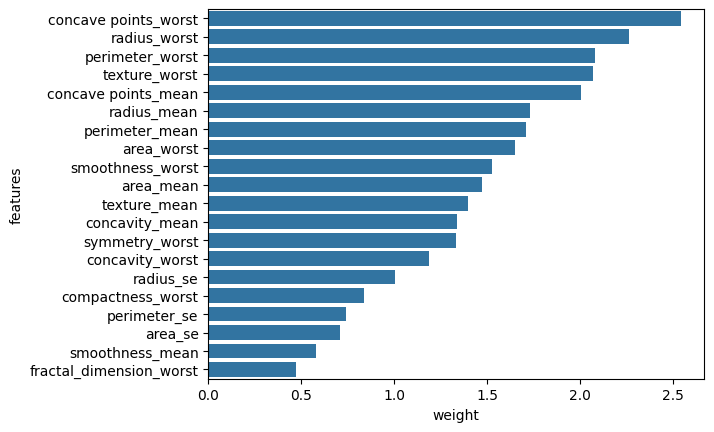

In [223]:
weight_df = pd.DataFrame({
    'features': (numeric_cols),
    'weight': model.coef_.tolist()[0]
}) 

sns.barplot(data=weight_df.sort_values(by= 'weight', ascending= False).head(20), x='weight', y='features')

In [224]:
train_preds = model.predict(train_inputs)
train_prob = model.predict_proba(train_inputs).round(3)

model.classes_, train_prob

(array([0, 1], dtype=int64),
 array([[0.989, 0.011],
        [0.064, 0.936],
        [0.987, 0.013],
        [0.99 , 0.01 ],
        [0.956, 0.044],
        [0.   , 1.   ],
        [0.008, 0.992],
        [0.914, 0.086],
        [0.95 , 0.05 ],
        [0.968, 0.032],
        [0.043, 0.957],
        [0.981, 0.019],
        [0.976, 0.024],
        [0.99 , 0.01 ],
        [0.029, 0.971],
        [0.96 , 0.04 ],
        [0.741, 0.259],
        [0.024, 0.976],
        [0.982, 0.018],
        [0.123, 0.877],
        [0.022, 0.978],
        [0.881, 0.119],
        [0.981, 0.019],
        [0.025, 0.975],
        [0.99 , 0.01 ],
        [0.976, 0.024],
        [0.978, 0.022],
        [0.   , 1.   ],
        [0.519, 0.481],
        [0.989, 0.011],
        [0.027, 0.973],
        [0.974, 0.026],
        [0.557, 0.443],
        [0.977, 0.023],
        [0.063, 0.937],
        [0.019, 0.981],
        [0.424, 0.576],
        [0.995, 0.005],
        [0.077, 0.923],
        [0.854, 0.146],
        [0.

In [225]:
accuracy_score(train_preds, train_target)

0.9624413145539906

In [ ]:
model = LogisticRegression(solver='')


In [252]:
def predict_and_graph(inputs,target, name=''):
    solver = int(input('Which model? 1:lbfgs, 2:liblinear, 3:newton-cg, 4:newton-cholesky, 5:sag, 6:saga'))
    if solver == 1:
        solver = 'lbfgs'
    elif solver == 2:
        solver='liblinear'
    elif solver == 3:
        solver = 'newton-cg'
    elif solver == 4:
        solver = 'newton-cholesky'
    elif solver == 5:
        solver = 'sag'
    elif solver == 6:
        solver = 'saga'
    else:
        return print('Model Value must be 1-6')
    model = LogisticRegression(solver=solver)
    model.fit(train_inputs, train_target) 
    preds = model.predict(inputs)

    accuracy = accuracy_score(preds, target)

    print(f"The accuracy is {round(accuracy,2)}% with {solver} model")

    cm = confusion_matrix(target, preds, normalize='true')

    plt.figure()
    sns.heatmap(cm, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title(f"{name} Confusion Matrix")

    return preds

The accuracy is 0.96% with sag model


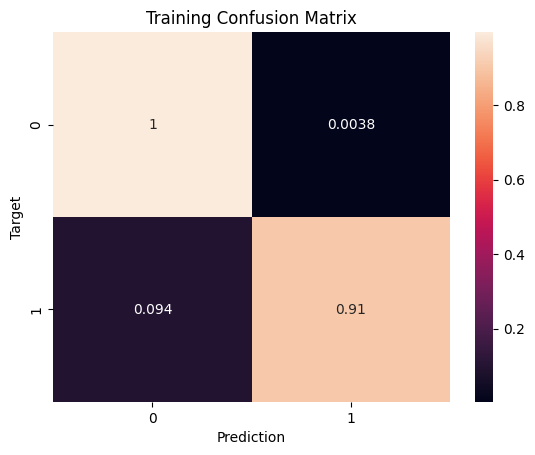

In [253]:
train_results = predict_and_graph(train_inputs, train_target, 'Training')

In [228]:
train_preds, train_target

(array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 

In [229]:
#val_results = predict_and_graph(val_inputs, val_target, 'Validation')

The accuracy is 0.97%


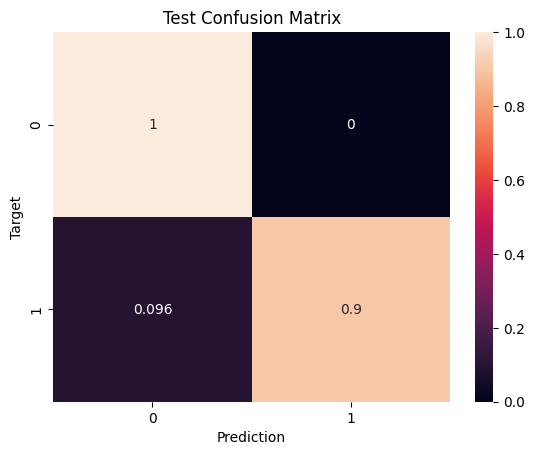

In [230]:
test_results = predict_and_graph(test_inputs, test_target, 'Test')